In [1]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from tqdm import tqdm

In [15]:
AgNews = pd.read_csv(
    "../data/CharCnn_Keras-master/data/ag_news_csv/train.csv",
    header=None,
)

In [18]:
AgNews.columns = ["class", "title", "description"]

In [31]:
with open("../data/CharCnn_Keras-master/data/ag_news_csv/classes.txt", mode="r") as f:
    classes = f.read().replace('/', '').split("\n")

In [41]:
documents = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(AgNews.description)]

In [42]:
model = Doc2Vec(documents, vector_size=2, window=5, min_count=1, workers=2)

In [43]:
vectors = dict()
for idx, text in tqdm(enumerate(AgNews.description)):
    vectors[idx]=model.infer_vector(text.split(' '))

120000it [07:25, 269.40it/s]


In [46]:
kmeans = KMeans(n_clusters=4)

In [47]:
pred = kmeans.fit(mat)

In [48]:
pred = kmeans.fit_predict(mat)

In [58]:
label = AgNews["class"].to_numpy()

In [84]:
adjusted_mutual_info_score(label, pred)

0.04265378001234666

In [64]:
mat = pd.DataFrame(np.vstack(vectors.values()), index=vectors.keys(), columns=["x", "y"])

/tmp/ipykernel_219/2479249411.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mat = pd.DataFrame(np.vstack(vectors.values()), index=vectors.keys(), columns=["x", "y"])


In [68]:
AgNewsVec = pd.merge(AgNews, mat, left_index=True, right_index=True)

In [72]:
AgNewsVec["pred"] = pred

<AxesSubplot: xlabel='x', ylabel='y'>

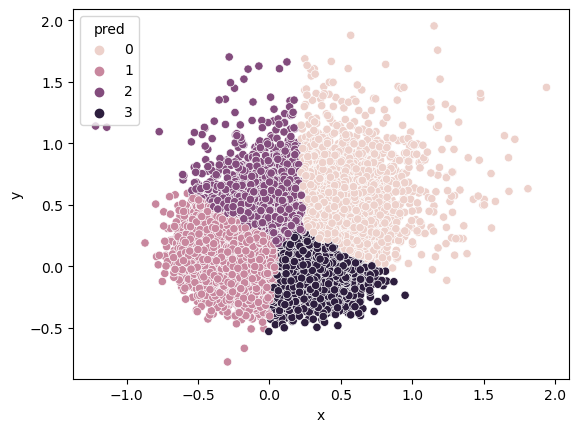

In [77]:
sns.scatterplot(data=AgNewsVec, x="x", y="y", hue="pred")

<AxesSubplot: xlabel='x', ylabel='y'>

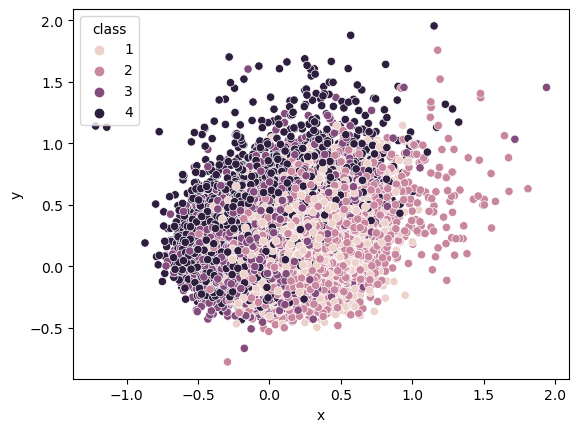

In [78]:
sns.scatterplot(data=AgNewsVec, x="x", y="y", hue="class", style="class")

<AxesSubplot: xlabel='x', ylabel='y'>

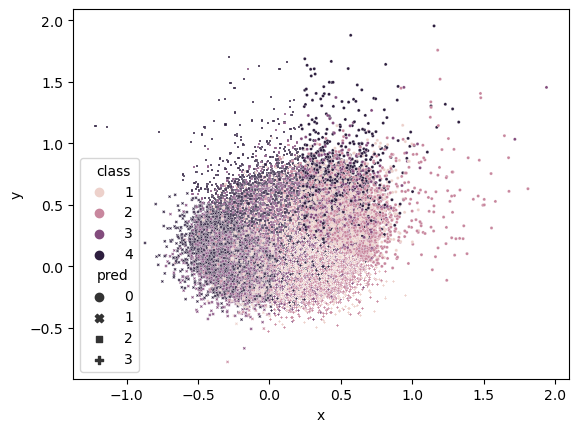

In [82]:
sns.scatterplot(data=AgNewsVec, x="x", y="y", hue="class", style="pred", s=5)